In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [127]:
df = pd.read_csv("insurance_cross_sell.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Analizziamo il Dataset

In [128]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [129]:
df.shape

(381109, 12)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Controllo se ci sono dati nulli e duplicati

In [131]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Non ci sono dati nulli

In [132]:
df.duplicated().any()

False

Non ci sono duplicati

#Exploratory Data Analysis

## Visualizzo i dati relativi alla feature "Response"

<ipython-input-133-805bc22fff08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette=['orange', 'blue'])
<ipython-input-133-805bc22fff08>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No', 'Yes'])


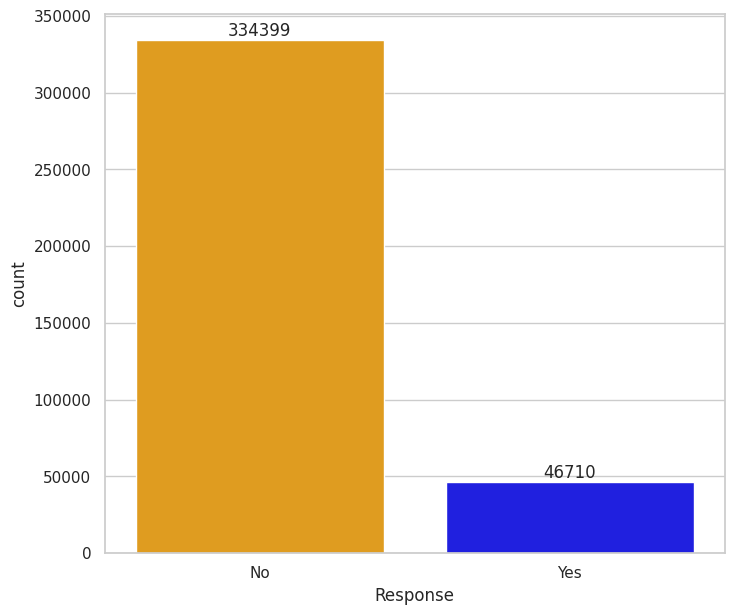

In [133]:
fig,ax = plt.subplots(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x='Response', data=df, palette=['orange', 'blue'])
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set_xticklabels(['No', 'Yes'])
plt.show()

Possiamo notare dal grafico che i dati sono altamente sbilanciati

## Analizziamo anche il confronto tra le varie Feautes con il Target


### Age e Response



[Text(0.5, 1.0, 'Age and Response')]

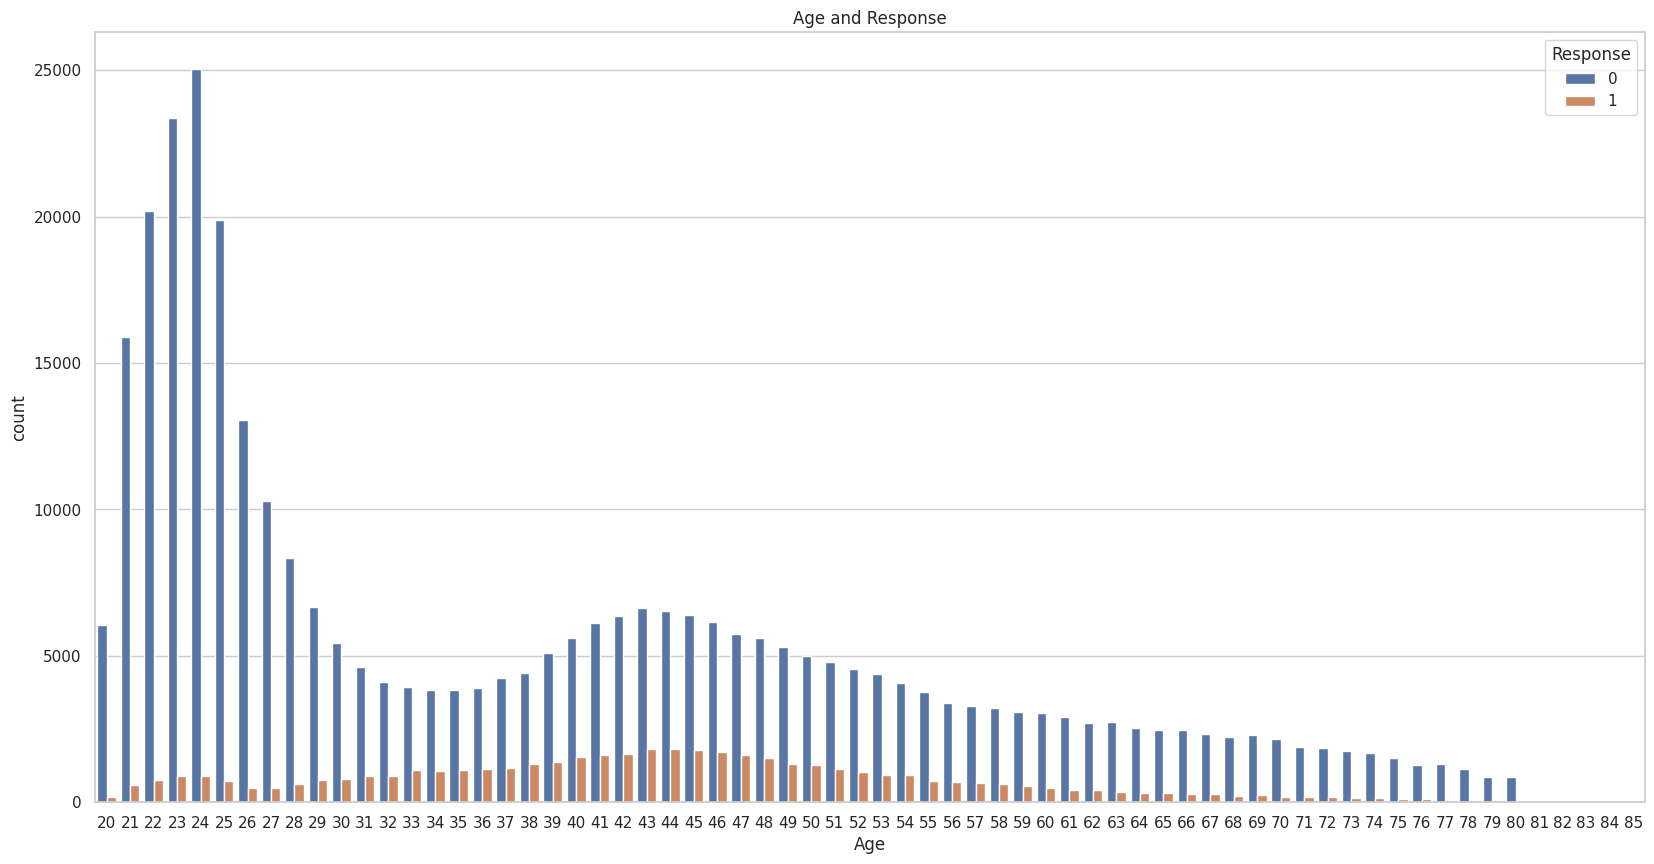

In [134]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(data= df, hue='Response',x='Age',ax=ax)
ax.set(title='Age and Response')

Si può notare che il range di età con maggiori probabilità di essere interessate all'assicurazione è compresa tra i 30 e i 60 anni.

### Gender and Response

<ipython-input-135-b2e5b8651c20>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

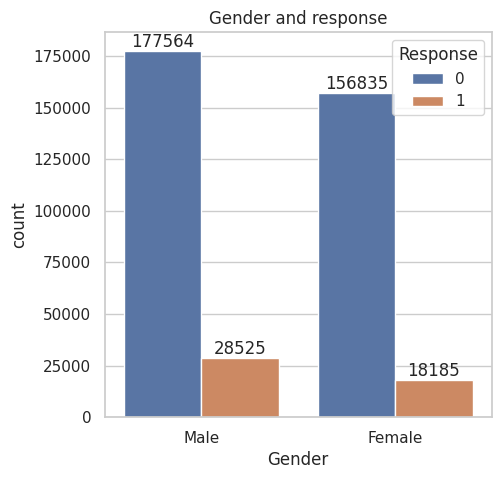

In [135]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df,x= df['Gender'],hue= df['Response'] )
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set(title='Gender and response')
ax.set_xticklabels(['Male', 'Female'])

Per quanto riguarda il genere le distribuzioni sono abbastanza eque, la categoria maschile è di poco superiore di quella femminile.

### Driving License and Response

[Text(0.5, 1.0, 'Driving lincense and response')]

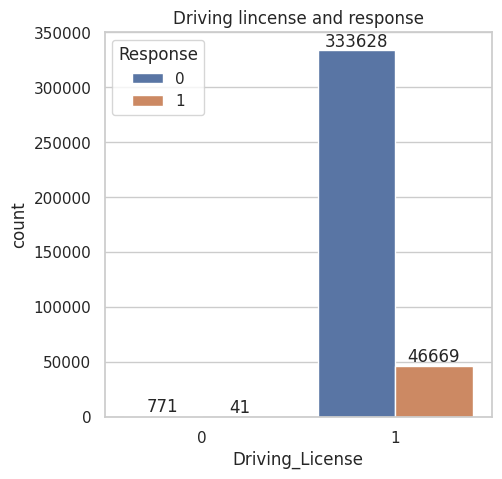

In [136]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='Driving_License',hue= 'Response')
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set(title='Driving lincense and response')



Possiamo vedere come i clienti interessati all'assicurazione sono quasi tutti in possesso di una patente

### Vechicle Damage and Response


[Text(0.5, 1.0, 'Vehicle_Damage and response')]

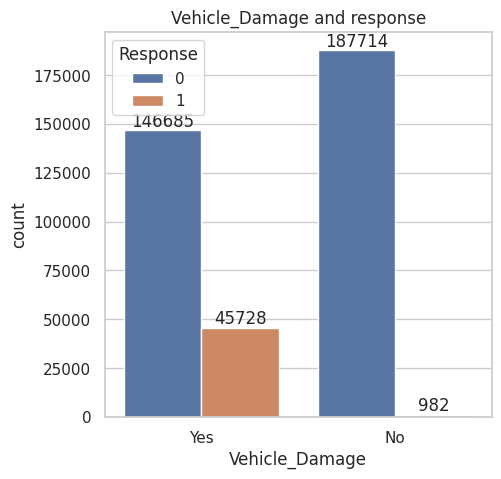

In [137]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='Vehicle_Damage',hue= 'Response', ax=ax)
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set(title='Vehicle_Damage and response')

Da questo grafico invece possiamo notare come i clienti che hanno subito danni al veicolo sono più interessati all'assicurazione.



### Vechicle Age and Response


[Text(0.5, 1.0, 'Vehicle_Age and response')]

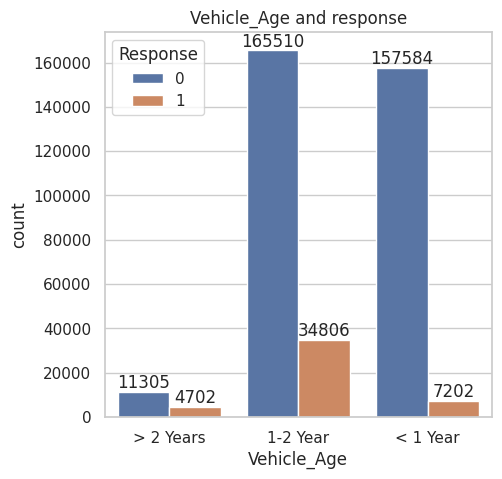

In [138]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='Vehicle_Age',hue= 'Response' )
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set(title='Vehicle_Age and response')

Si nota come clienti con età del veicolo di 1-2 anni sono più propensi ad assicurarsi rispetto agli altri

### Previously Insured and Response

[Text(0.5, 1.0, 'Previously_Insured v/s response')]

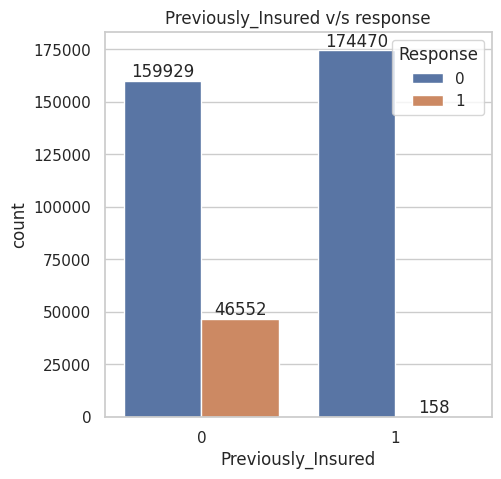

In [139]:
fig,ax=plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='Previously_Insured',hue= 'Response' )
ax.bar_label(ax.containers[0]); ax.bar_label(ax.containers[1])
ax.set(title='Previously_Insured v/s response')

E' probabile che i clienti che non sono assicurati in precedenza siano interessati.

### Annual Premium and Response

<ipython-input-140-35e969465bf8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[item])


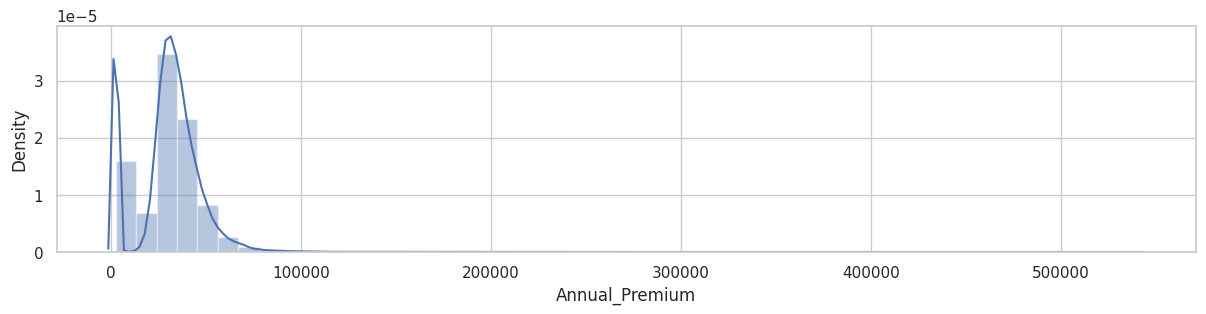

In [140]:
plt.figure(figsize=(50,10))
for index,item in enumerate(['Annual_Premium']):
  plt.subplot(3,3,index+1)
  sns.distplot(df[item])

Dai grafico precedente notiamo come la distribuzione dei valori per la variabile Annual_Premium è distorta

Controlliamo se per questa variabile sono presenti outliers tramite un grafico Boxplot

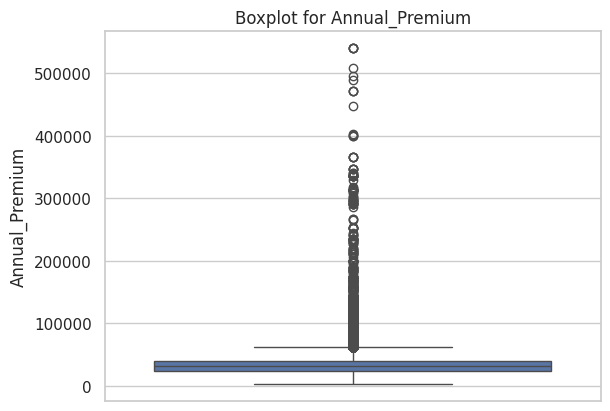

In [141]:
for col in ['Annual_Premium']:
    sns.boxplot(df[col])
    plt.title('Boxplot for Annual_Premium')
    plt.show()

Notiamo che sono presenti Outliers

Rimuoviamo gli outliers utilizzando il metodo IQR
(https://medium.com/@pp1222001/outlier-detection-and-removal-using-the-iqr-method-6fab2954315d)

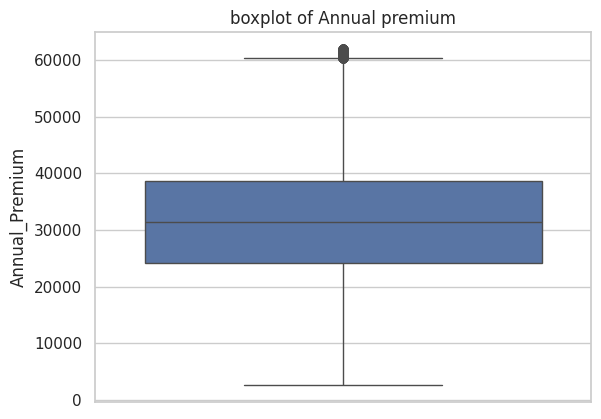

In [142]:
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Remove outliers from the "Annual_Premium" column
df = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()


Outliers Rimossi !

### Confusion Matrix

Selezionare solo le colonne numeriche per il calcolo della correlation matrix

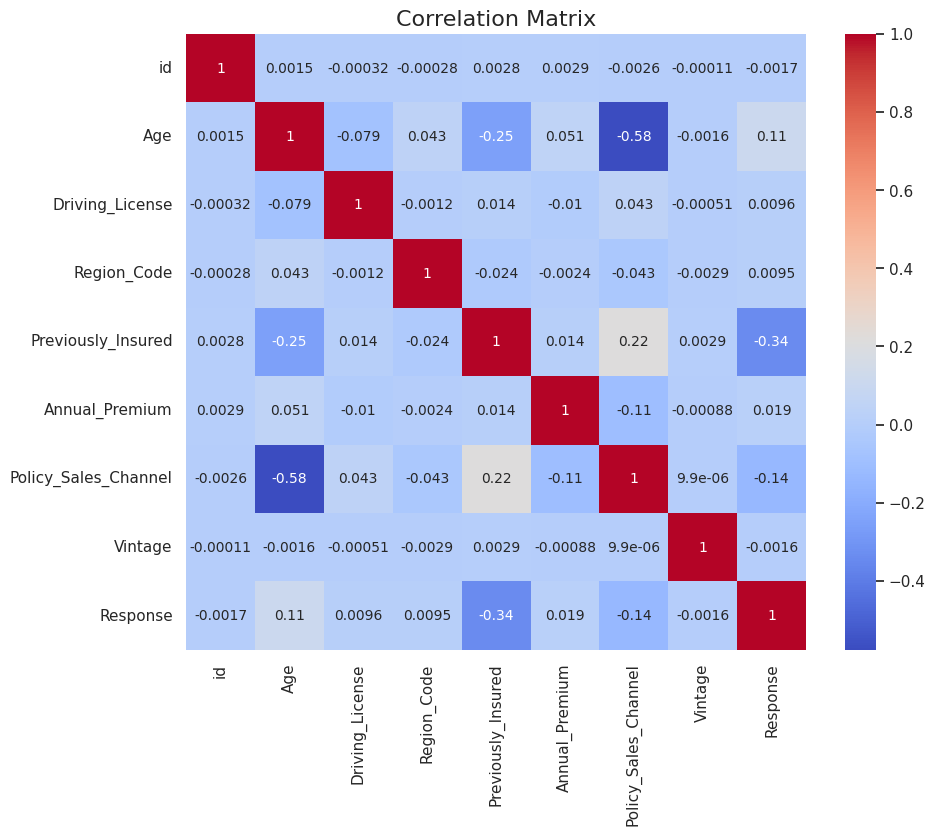

In [143]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Matrix', size=16)
plt.show()

Dalla Matrice di Correlazione possiamo notare che la variabile target "Response" è poco correlata con la variabile "Vintage", notiamo infatti un valore prossimo allo 0.

Cosi come il valore di id che è un valore non significatico essendo un valore univoco non contiene informazioni utili per l'analisi.

Andiamo quindi ad escludere dall'analisi queste due feature!

In [144]:
df.drop(['id'],axis=1 ,inplace=True)

df.drop(['Driving_License'],axis=1 ,inplace=True)

# Encoding
Convertiamo le variabili categoriche Gender, Vehicle_Age e Veichle_Damage in variabili numeriche facendo Label Encoding

In [145]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})

df['Vehicle_Age']= df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0})

df.head()


,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0


### Separiamo adesso le variabili indipendenti dalla variabile target :

In [146]:
x=df.drop(['Response'],axis=1)
y=df['Response']

## Gestione dei dati sbilanciati tramite OverSampling

In [125]:
from imblearn.over_sampling import RandomOverSampler

random_sample = RandomOverSampler()
x_new,y_new = random_sample.fit_resample(x,y)

In [147]:
from collections import Counter
print('Dimensione del Dataset originale {}'.format(Counter(y)))
print('Dimensione del Dataset dopo Oversampling {}'.format(Counter(y_new)))

Dimensione del Dataset originale Counter({0: 325634, 1: 45155})
Dimensione del Dataset dopo Oversampling Counter({1: 325634, 0: 325634})


## Train e Test data

Creaiamo adesso i set di training e testing

In [148]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455887, 9) (195381, 9) (455887,) (195381,)


## Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Logistic Regression

[[58140 39675]
 [ 2375 95191]]
[[58140 39675]
 [ 2375 95191]]
Accuracy is : 0.7847794821400238


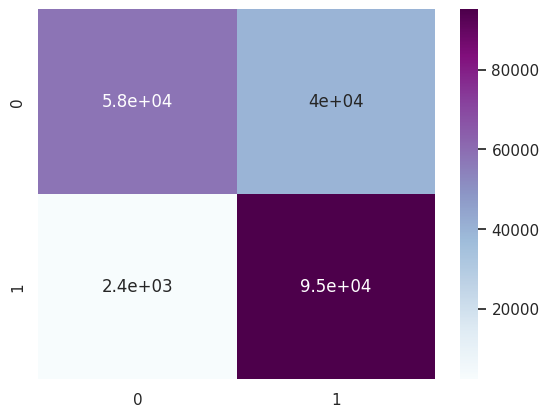

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_lr= accuracy_score(y_test,y_pred)
recall_lr = recall_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred)
f1score_lr= f1_score(y_test,y_pred)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
#print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

acc = accuracy_score(y_test,y_pred)
print("Accuracy is :",acc)

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     97815
           1       0.71      0.98      0.82     97566

    accuracy                           0.78    195381
   macro avg       0.83      0.79      0.78    195381
weighted avg       0.83      0.78      0.78    195381



ROC_AUC Score of Logistic regression is : 0.8332863207601308


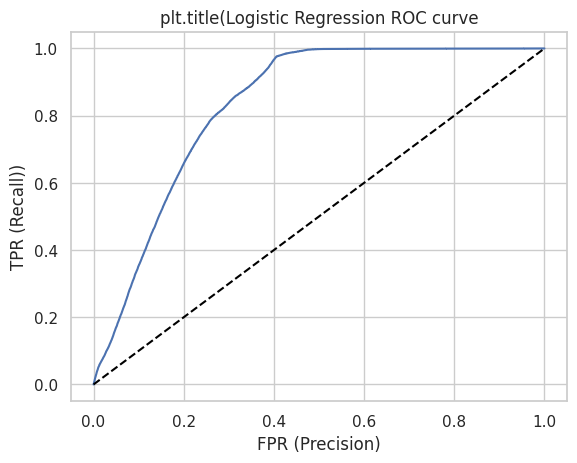

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
AUC_LR=roc_auc_score(y_pred,y_test)
print("ROC_AUC Score of Logistic regression is :",AUC_LR)

y_score = lr.predict_proba(x_test)[:, 1]

y_true = y_test

pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('plt.title(Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall))')
plt.xlabel('FPR (Precision)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()

### KNeighborsClassifier

[[73156 24659]
 [ 3203 94363]]
[[73156 24659]
 [ 3203 94363]]
Accuracy score of knn 0.857396573873611


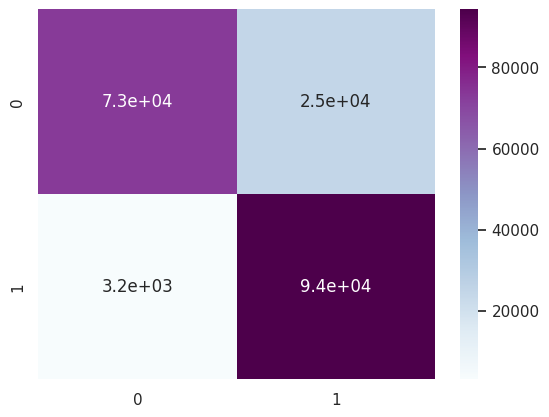

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_knn = accuracy_score(y_test,pred)
recall_knn  = recall_score(y_test,pred)
precision_knn = precision_score(y_test,pred)
f1score_knn = f1_score(y_test,pred)

# prediction and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

print(confusion_matrix(y_test,pred))
cm = confusion_matrix(y_test,pred)
#print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

print('Accuracy score of knn',accuracy_score(y_test,pred))

In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     97815
           1       0.79      0.97      0.87     97566

    accuracy                           0.86    195381
   macro avg       0.88      0.86      0.86    195381
weighted avg       0.88      0.86      0.86    195381



ROC_AUC Score of KNN is: 0.8754366102237934


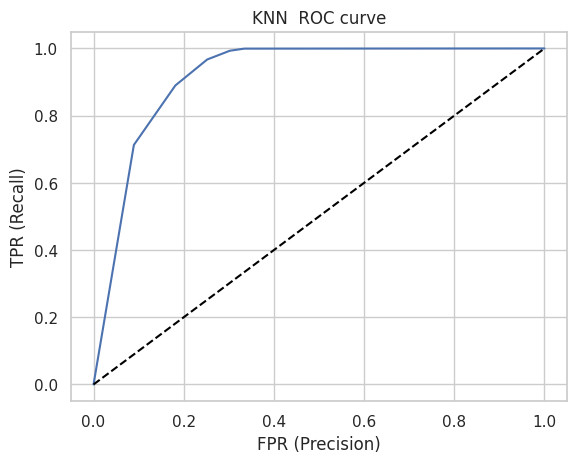

In [156]:
AUC_knn=roc_auc_score(pred,y_test)
print("ROC_AUC Score of KNN is:",AUC_knn)

y_score = knn.predict_proba(x_test)[:, 1]

y_true = y_test

pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('KNN  ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()

### Random Forest

[[86795 11020]
 [  370 97196]]
[[86795 11020]
 [  370 97196]]


<Axes: >

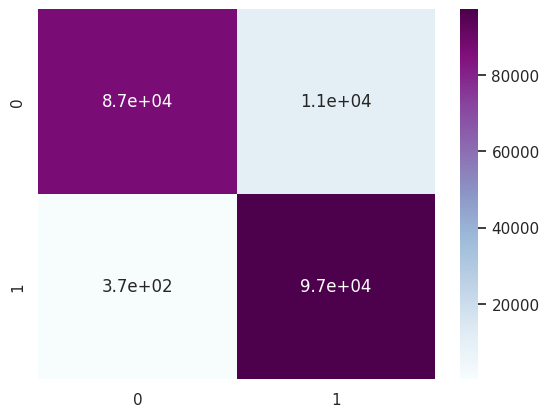

In [157]:
from sklearn .ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
acc_rf = accuracy_score(y_test,rf_pred)
recall_rf  = recall_score(y_test,rf_pred)
precision_rf = precision_score(y_test,rf_pred)
f1score_rf = f1_score(y_test,rf_pred)

print(confusion_matrix(y_test,rf_pred))

cm = confusion_matrix(y_test,rf_pred)
#print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [158]:
print('Accuracy score of Random Forest is ',accuracy_score(y_test,rf_pred))

Accuracy score of Random Forest is  0.941703645697381


In [159]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     97815
           1       0.90      1.00      0.94     97566

    accuracy                           0.94    195381
   macro avg       0.95      0.94      0.94    195381
weighted avg       0.95      0.94      0.94    195381



In [162]:
AUC_rf=roc_auc_score(rf_pred,y_test)
print("ROC_AUC Score of Random Forest is:",AUC_rf)

ROC_AUC Score of Random Forest is: 0.9469609033333933


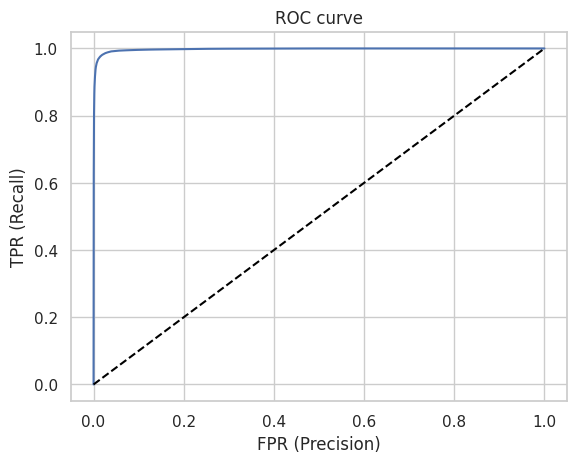

In [160]:

y_score = rf.predict_proba(x_test)[:, 1]

y_true = y_test

pos_label = 1

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=1)

plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.grid(True)
plt.show()


Per finire facciamo un confronto tra i tre modelli proposti per vedere insieme tutti i risultati

In [164]:
model_name =['Logistic regression', 'KNeighbors','Randomforest']

data={"Accuracy":[acc_lr,acc_knn,acc_rf],"Recall":[recall_lr,recall_knn,recall_rf],
      "Precision":[precision_lr,precision_knn,precision_rf],
    'f1_score':[f1score_lr,f1score_knn,f1score_rf],
    "ROC_AUC":[AUC_LR,AUC_knn,AUC_rf]}

result=pd.DataFrame(data=data,index=model_name)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.784779,0.975658,0.705819,0.819087,0.833286
KNeighbors,0.857397,0.967171,0.792820,0.871359,0.875437
Randomforest,0.941704,0.996208,0.898167,0.944650,0.946961
